In [1]:
import copy
import xarray as xr
import gsw
import pandas as pd
from xmitgcm import open_mdsdataset
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 14
    , 'legend.markerscale': 1., 'axes.titlesize': 16, 'axes.labelsize' : 14,
      'legend.fontsize' : 10,'legend.handlelength': 2})

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

In [3]:
rclv_30 = np.zeros(20)
rclv_90 = np.zeros(20)

tt = np.arange(1, 21, 1)
for mon in np.arange(20):
    fntmp1 = '/home/tls2913/scripts/RCLV/statistics_2d/rclv_30_0.1/rclv_' + \
        str(mon+1).zfill(3) + '.npy'

    fntmp3 = '/home/tls2913/scripts/RCLV/statistics_2d/rclv_90_0.1/rclv_' + \
        str(mon+1).zfill(3) + '.npy'

    data1 = np.load(fntmp1)
    data3 = np.load(fntmp3)

    rclv_30[mon] = data1.shape[0]
    rclv_90[mon] = data3.shape[0]

In [4]:
df = pd.read_pickle('/home/tls2913/scripts/SSH_eddy/eddy_df.pkl')
ssh_30 = np.zeros(20)
ssh_60 = np.zeros(20)
ssh_90 = np.zeros(20)

eddyid_30 = np.zeros(20)
for mon in np.arange(20):
    time = 10000001 + mon * 90
    dftmp1 = df.loc[df.day == time]
    dftmp2 = df.loc[df.day == time+29]
    idtmp1 = dftmp1.id.values
    idtmp2 = dftmp2.id.values
    tmp = [item for item in idtmp1 if item in idtmp2]
    ssh_30[mon] = len(tmp)
    
for mon in np.arange(20):
    time = 10000001 + mon * 90
    dftmp1 = df.loc[df.day == time]
    dftmp2 = df.loc[df.day == time+89]
    idtmp1 = dftmp1.id.values
    idtmp2 = dftmp2.id.values
    tmp = [item for item in idtmp1 if item in idtmp2]
    ssh_90[mon] = len(tmp)    

In [5]:
print(np.sum(ssh_30))
print(np.sum(ssh_90))

4144.0
957.0


In [6]:
num_ssh = 0
for mon in np.arange(20):
    df = pd.read_pickle('/home/tls2913/scripts/RCLV/statistics_2d/rclv_30_0.1/ssh_eddy_' + str(mon+1).zfill(3) + '.pkl')
    num = df.shape[0] / 30
    
    num_ssh = num_ssh + num
print(num_ssh)

1973.0


In [7]:
num_rclv = 0
for mon in np.arange(20):
    fntmp1 = '/home/tls2913/scripts/RCLV/statistics_2d/rclv_30_0.1/rclv_' + \
        str(mon+1).zfill(3) + '.npy'

    data1 = np.load(fntmp1)
    num = data1.shape[0]
    num_rclv = num_rclv + num
    
print(num_rclv)

5412


In [8]:
num_rclv_90 = 0
for mon in np.arange(20):
    fntmp1 = '/home/tls2913/scripts/RCLV/statistics_2d/rclv_90_0.1/rclv_' + \
        str(mon+1).zfill(3) + '.npy'

    data1 = np.load(fntmp1)
    num = data1.shape[0]
    num_rclv_90 = num_rclv_90 + num
    
print(num_rclv_90)

1221


In [9]:
num_over = 0
for mon in np.arange(20):
    fntmp1 = '/home/tls2913/scripts/RCLV/statistics_2d/rclv_30_0.1/rclv_new_' + \
        str(mon+1).zfill(3) + '.npy'

    data1 = np.load(fntmp1)
    num = data1.shape[0]
    num_over = num_over + num
    
print(num_over)

1973


In [10]:
num_over = 0
for mon in np.arange(20):
    fntmp1 = '/home/tls2913/scripts/RCLV/statistics_2d/rclv_90_0.1/rclv_90_new_' + \
        str(mon+1).zfill(3) + '.npy'

    data1 = np.load(fntmp1)
    num = data1.shape[0]
    num_over = num_over + num
    
print(num_over)

359


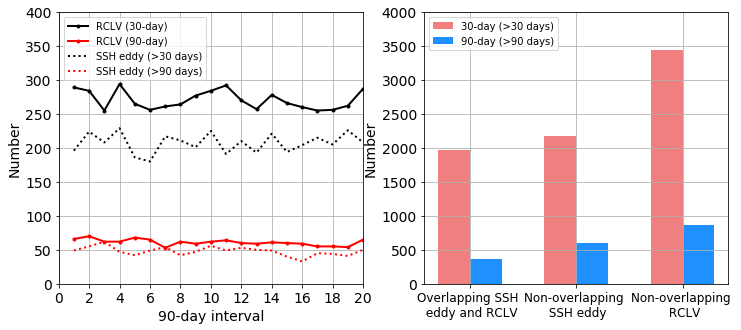

In [11]:
fig = plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(tt, rclv_30, marker='.', color='k', linewidth=2, label='RCLV (30-day)')
plt.plot(tt, rclv_90, marker='.', color='r', linewidth=2, label='RCLV (90-day)')
plt.plot(tt, ssh_30, color='k', linestyle=':', linewidth=2, label='SSH eddy (>30 days)')
plt.plot(tt, ssh_90, color='r', linestyle=':', linewidth=2, label='SSH eddy (>90 days)')

plt.grid()
plt.xlabel('90-day interval')
plt.ylabel('Number')
plt.xticks(np.arange(0, 21, 2));
plt.xlim(0, 20)
plt.ylim(0, 400)
plt.legend(loc=2)

plt.subplot(122)

ind = np.arange(3)
width = 0.3

data1 = [1973, 4144-1973, 5412-1973]
data2 = [359, 957-359, 1221-359]

plt.bar(ind-width/2, data1, width, label='30-day (>30 days)', color='lightcoral')
plt.bar(ind+width/2, data2, width, label='90-day (>90 days)', color='dodgerblue')

#plt.text(-0.25, 3000, 'G1: Overlapping SSH eddy and RCLV', size=10)
#plt.text(-0.25, 2700, 'G2: Non-overlapping SSH eddy', size=10)
#plt.text(-0.25, 2400, 'G3: Non-overlapping RCLV', size=10)

#plt.text(0, 3000, 'Overlapping SSH eddy and RCLV', size=12)

plt.ylim(0, 4000)
plt.grid()
plt.ylabel('Number')
plt.xticks(ticks=np.arange(3), labels=('Overlapping SSH \n eddy and RCLV', 
                                       'Non-overlapping \n SSH eddy', 'Non-overlapping \n RCLV'), size=12)
plt.legend(loc=2)

plt.savefig('Figure_04.png', dpi=300, bbox_inches='tight')

In [12]:
1973  / 4144

0.4761100386100386

In [13]:
1973  / 5412

0.364560236511456

In [14]:
359 / 957

0.37513061650992685

In [15]:
359 / 1221

0.294021294021294